In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

#Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS BISNIS/superstore_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


Berikut adalah penjelasan tentang variabel-variabelnya:


*   Response (target) - 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 sebaliknya
*   ID - ID unik dari setiap pelanggan
*   Year_Birth - Usia pelanggan
*   Complain - 1 jika pelanggan mengeluh dalam 2 tahun terakhir
*  Dt_Customer - tanggal pendaftaran pelanggan dengan perusahaan
* Education - tingkat pendidikan pelanggan
* Marital - status pernikahan pelanggan
* Kidhome - jumlah anak kecil dalam rumah tangga pelanggan
* Teenhome - jumlah remaja dalam rumah tangga pelanggan
* Income - pendapatan tahunan rumah tangga pelanggan
* MntFishProducts - jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
* MntMeatProducts - jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir
* MntFruits - jumlah yang dihabiskan untuk produk buah dalam 2 tahun terakhir
* MntSweetProducts - jumlah yang dihabiskan untuk produk manis dalam 2 tahun terakhir
* MntWines - jumlah yang dihabiskan untuk produk anggur dalam 2 tahun terakhir
* MntGoldProds - jumlah yang dihabiskan untuk produk emas dalam 2 tahun terakhir
* NumDealsPurchases - jumlah pembelian dengan diskon
* NumCatalogPurchases - jumlah pembelian menggunakan katalog (membeli barang yang akan dikirim melalui surat)
* NumStorePurchases - jumlah pembelian langsung di toko
* NumWebPurchases - jumlah pembelian melalui situs web perusahaan
* NumWebVisitsMonth - jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir
* Recency - jumlah hari sejak pembelian terakhir

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [ ]:
(df.isnull().sum()/len(df))

Id                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
Response               0.000000
Complain               0.000000
dtype: float64

In [ ]:
df['Income']=df['Income'].fillna(df['Income'].mode()[0])

In [ ]:
(df.isnull().sum()/len(df))

Id                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
Response               0.0
Complain               0.0
dtype: float64

#Data Analysis

<ipython-input-11-1ea010c7fde1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<Axes: >

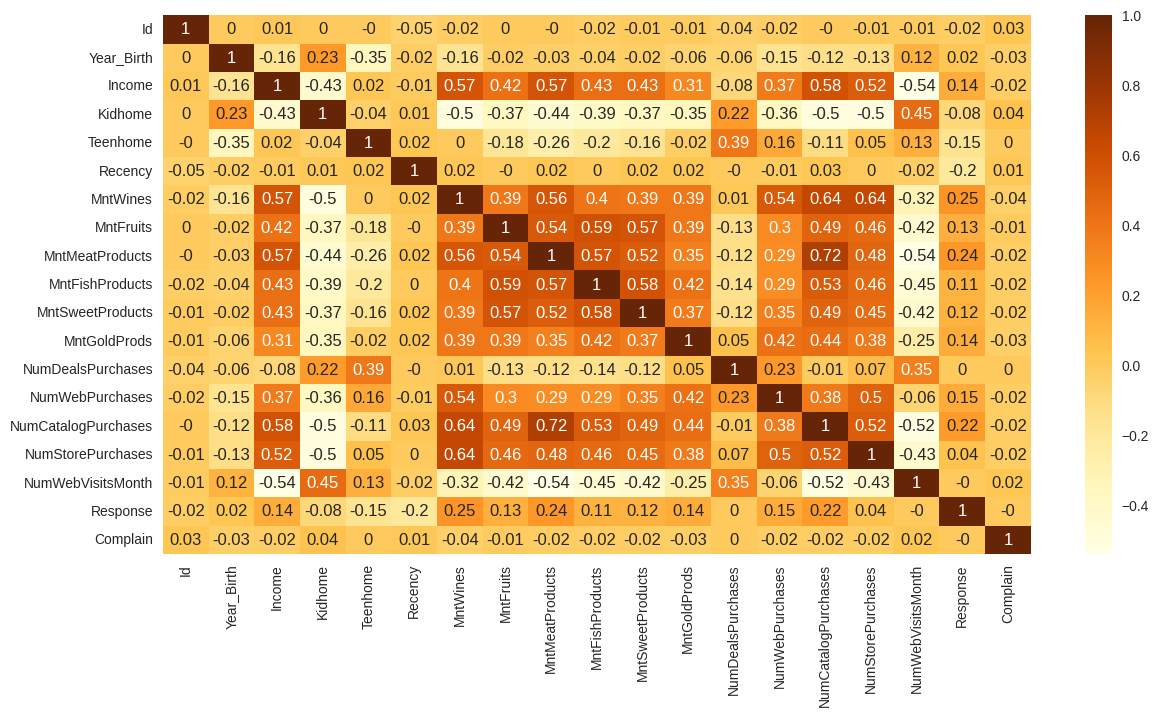

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

Dapat dilihat bahwa terdapat beberapa korelasi di atas 0,60, sehingga mari kita hapus variabel MntWines dan MntMeatProducts

In [ ]:
df = df.drop(['MntWines', 'MntMeatProducts'], axis = 1)

<ipython-input-13-1ea010c7fde1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<Axes: >

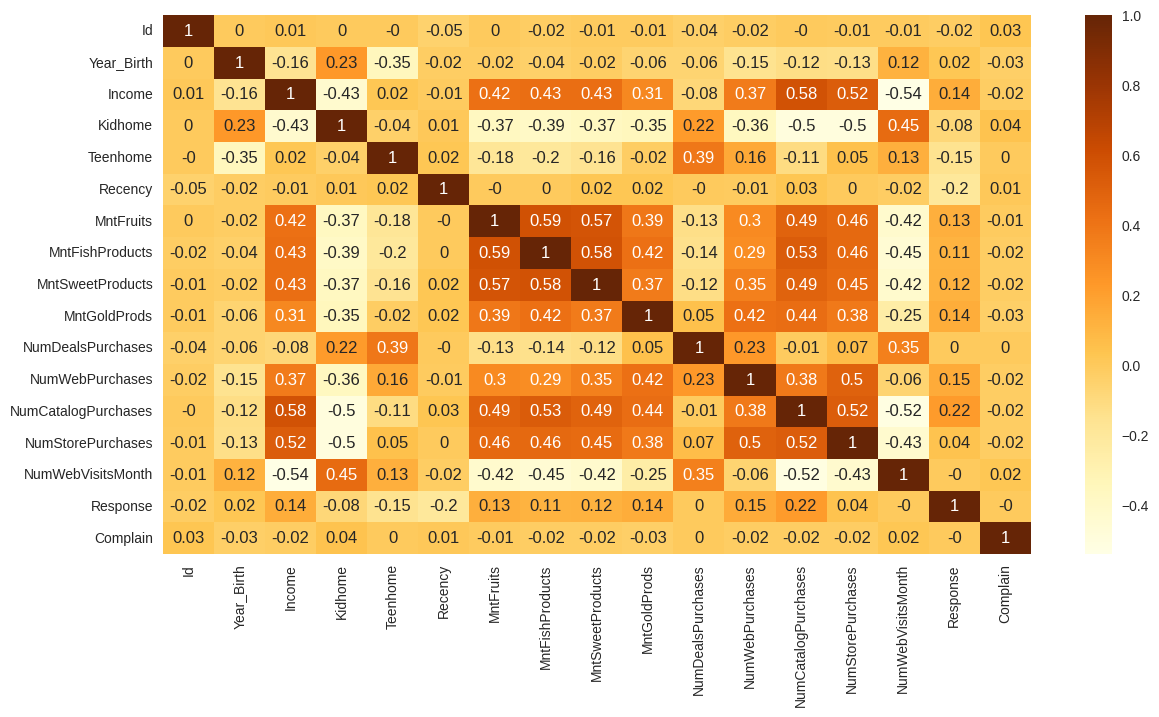

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<Axes: title={'center': 'Variable Complain'}, xlabel='Complain', ylabel='count'>

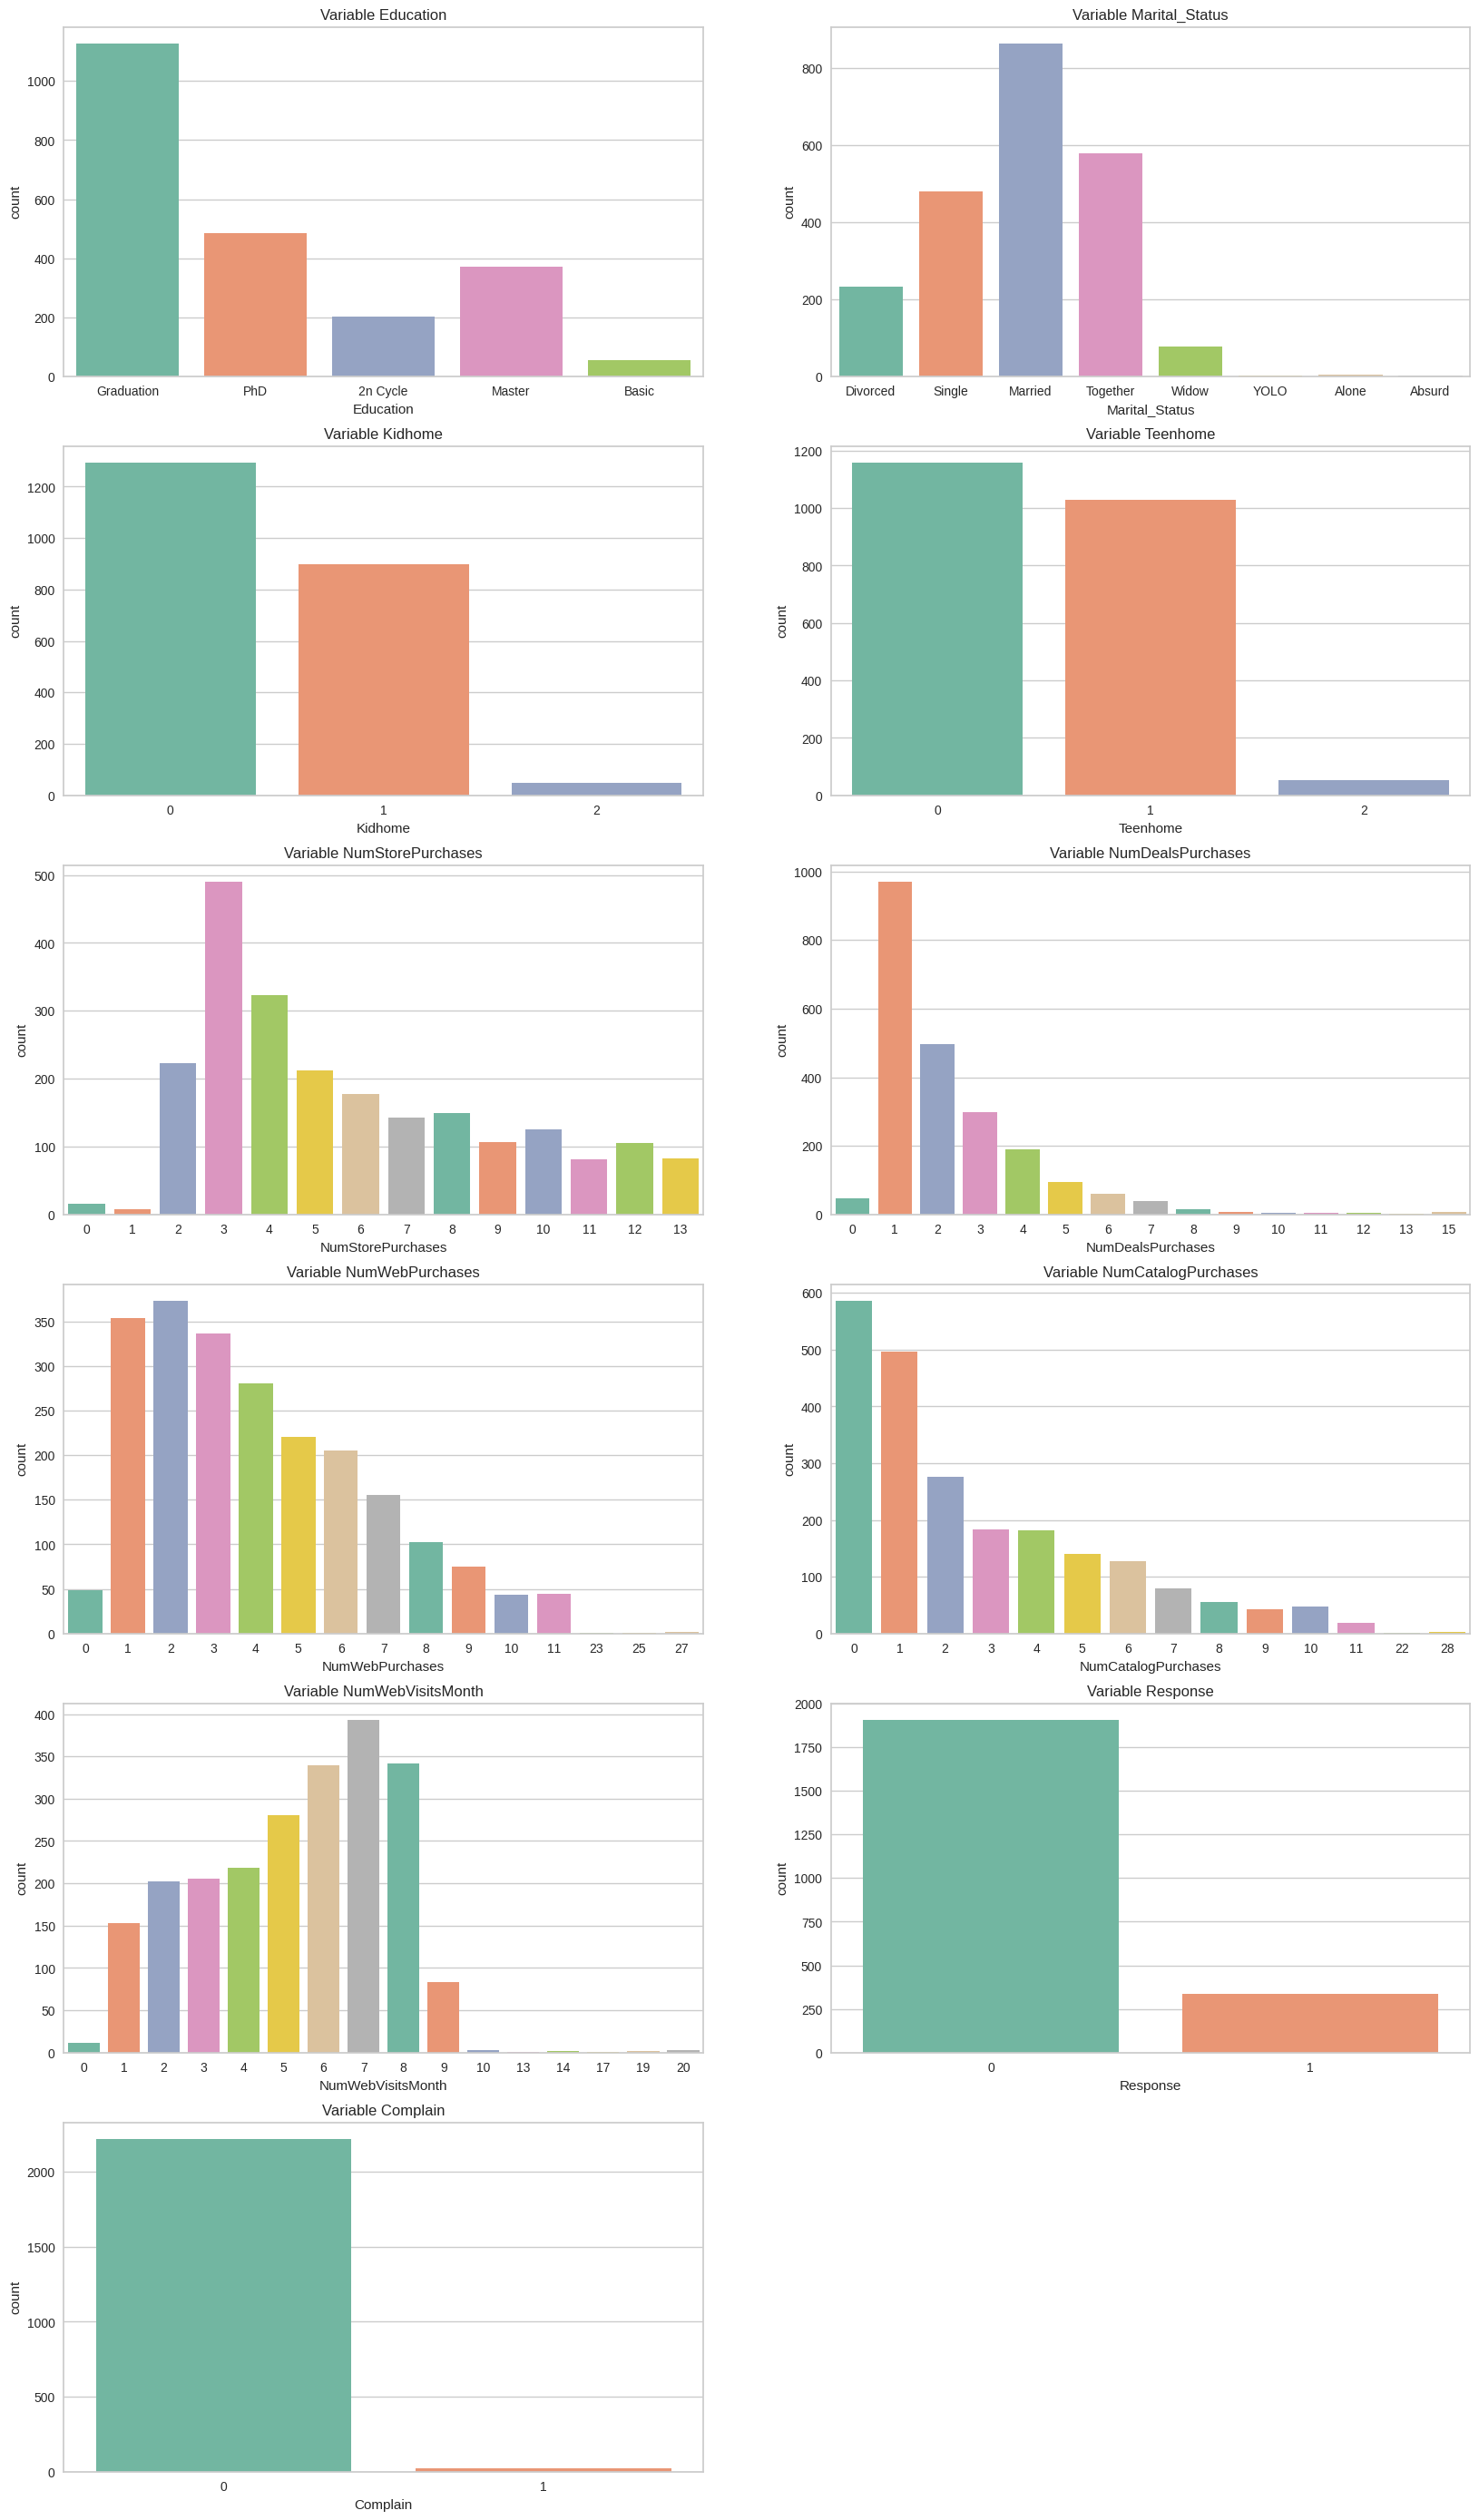

In [ ]:
plt.figure(figsize = (20,35))

plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(6,2,2)
plt.gca().set_title('Variable Marital_Status')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)

plt.subplot(6,2,3)
plt.gca().set_title('Variable Kidhome')
sns.countplot(x = 'Kidhome', palette = 'Set2', data = df)

plt.subplot(6,2,4)
plt.gca().set_title('Variable Teenhome')
sns.countplot(x = 'Teenhome', palette = 'Set2', data = df)

plt.subplot(6,2,5)
plt.gca().set_title('Variable NumStorePurchases')
sns.countplot(x = 'NumStorePurchases', palette = 'Set2', data = df)

plt.subplot(6,2,6)
plt.gca().set_title('Variable NumDealsPurchases')
sns.countplot(x = 'NumDealsPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,7)
plt.gca().set_title('Variable NumWebPurchases')
sns.countplot(x = 'NumWebPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,8)
plt.gca().set_title('Variable NumCatalogPurchases')
sns.countplot(x = 'NumCatalogPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,9)
plt.gca().set_title('Variable NumWebVisitsMonth')
sns.countplot(x = 'NumWebVisitsMonth', palette = 'Set2', data = df)

plt.subplot(6,2,10)
plt.gca().set_title('Variable Response')
sns.countplot(x = 'Response', palette = 'Set2', data = df)

plt.subplot(6,2,11)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df)

<Axes: xlabel='MntGoldProds', ylabel='Count'>

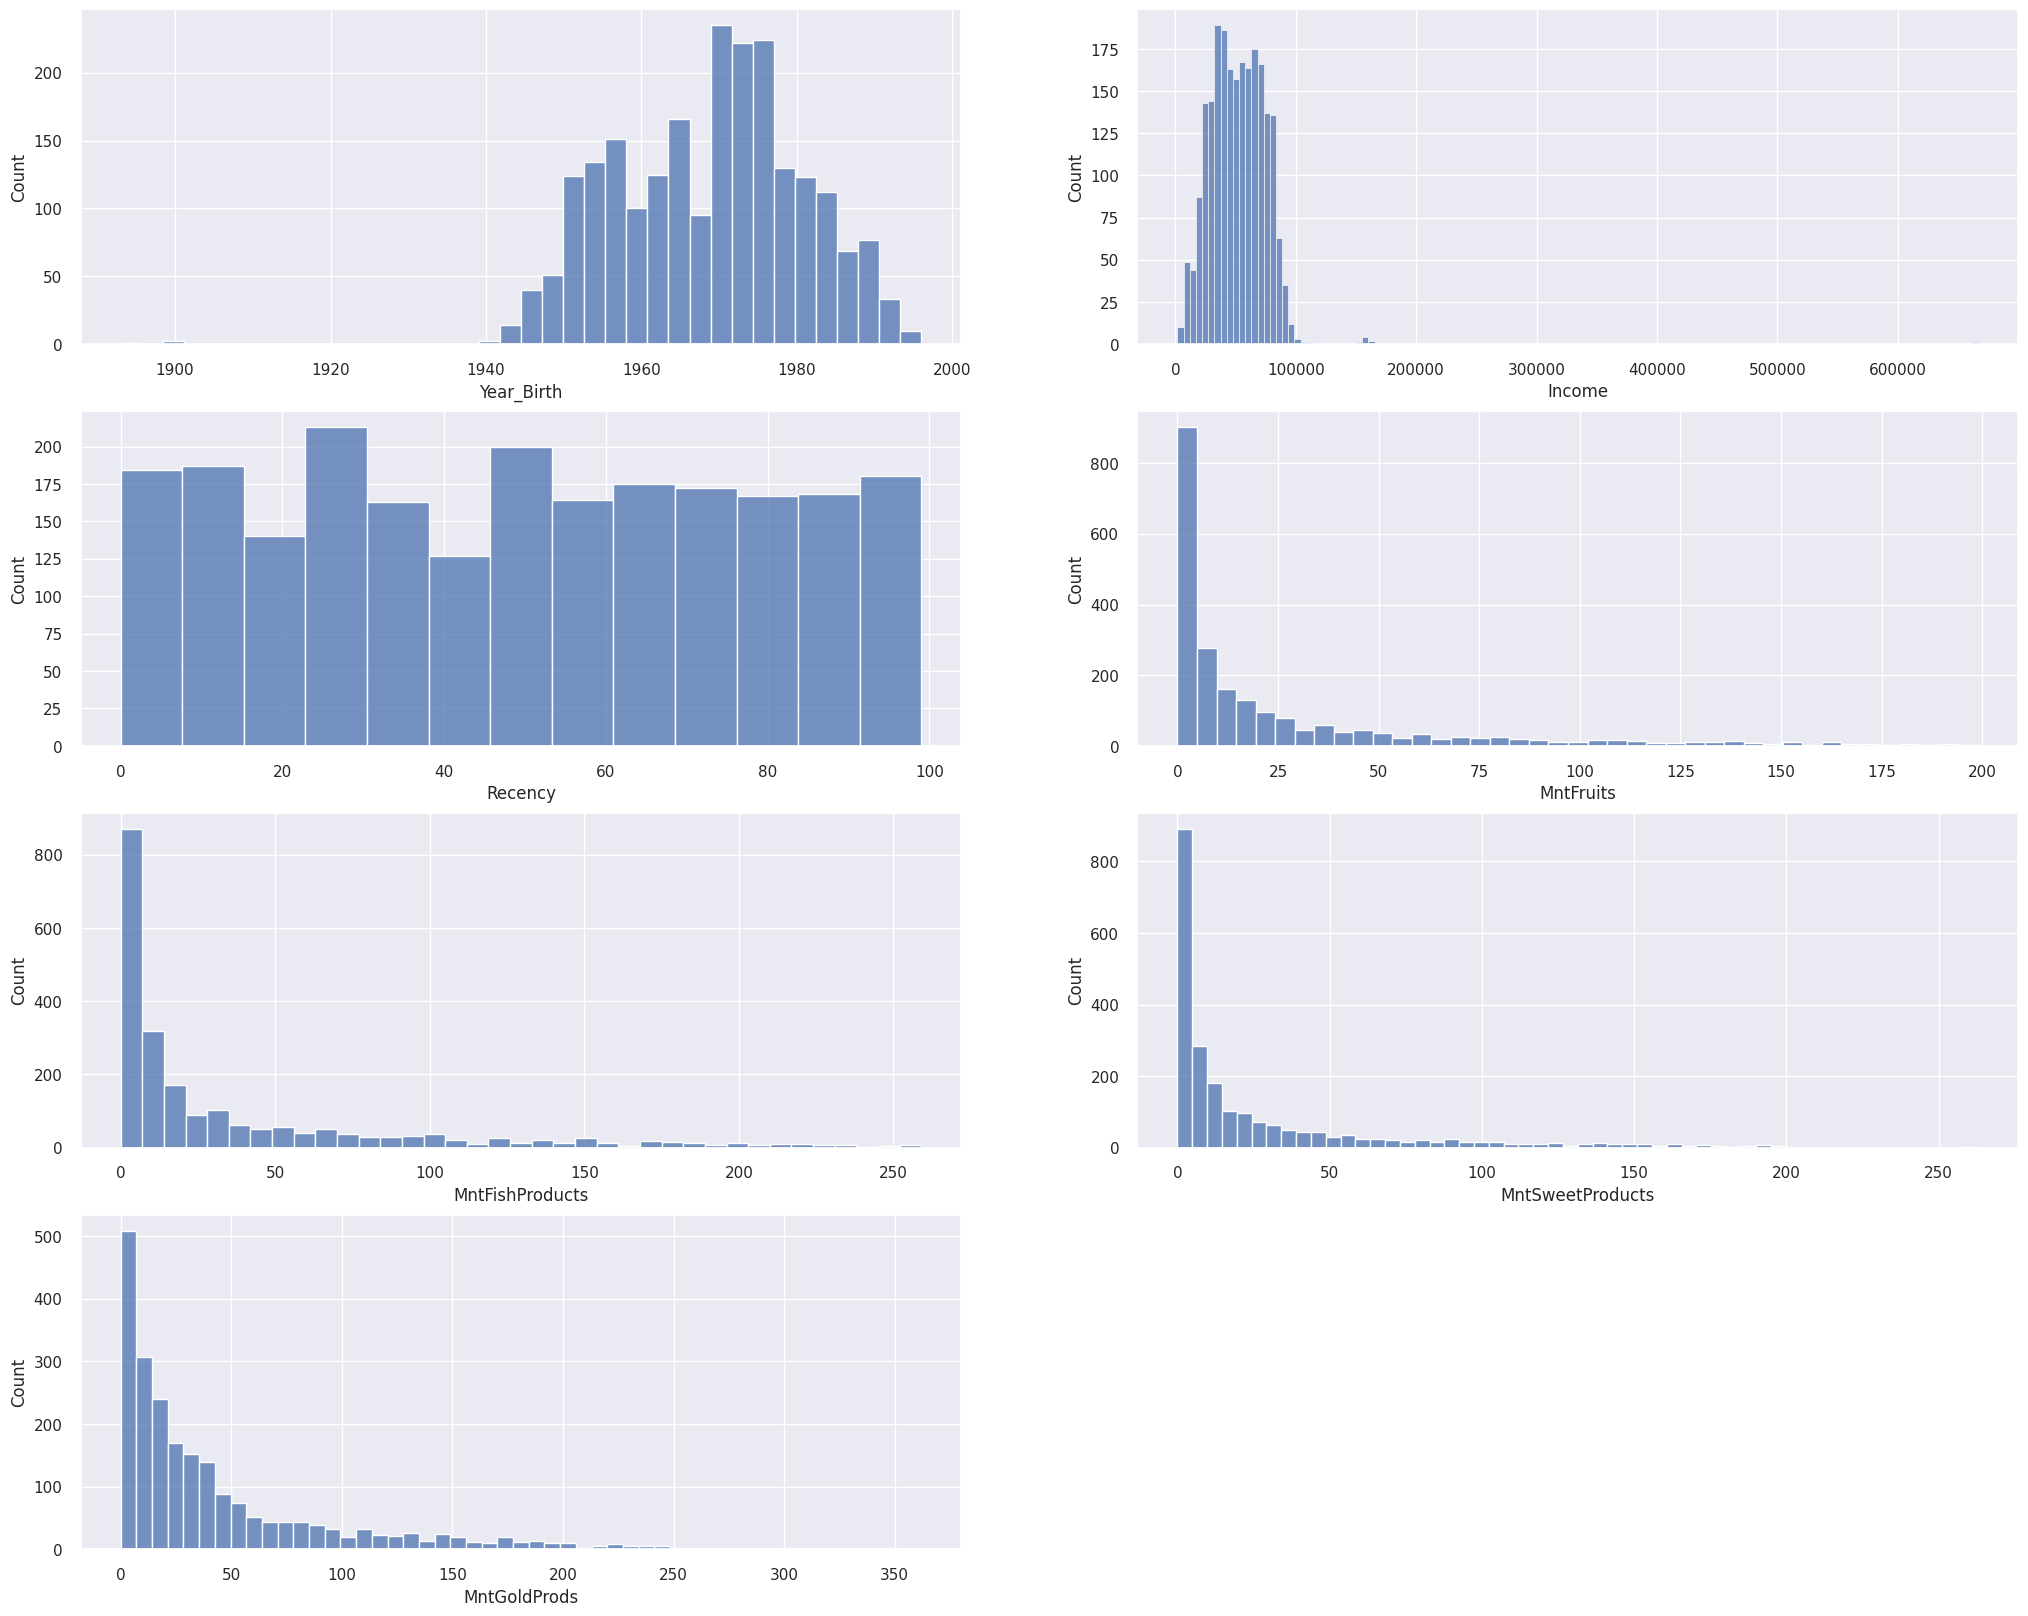

In [ ]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.histplot(df['Year_Birth'], kde = False)

plt.subplot(4,2,2)
sns.histplot(df['Income'], kde = False)

plt.subplot(4,2,3)
sns.histplot(df['Recency'], kde = False)

plt.subplot(4,2,4)
sns.histplot(df['MntFruits'], kde = False)

plt.subplot(4,2,5)
sns.histplot(df['MntFishProducts'], kde = False)

plt.subplot(4,2,6)
sns.histplot(df['MntSweetProducts'], kde = False)

plt.subplot(4,2,7)
sns.histplot(df['MntGoldProds'], kde = False)

<Axes: title={'center': 'Boxplot Year_Birth'}, xlabel='Year_Birth'>

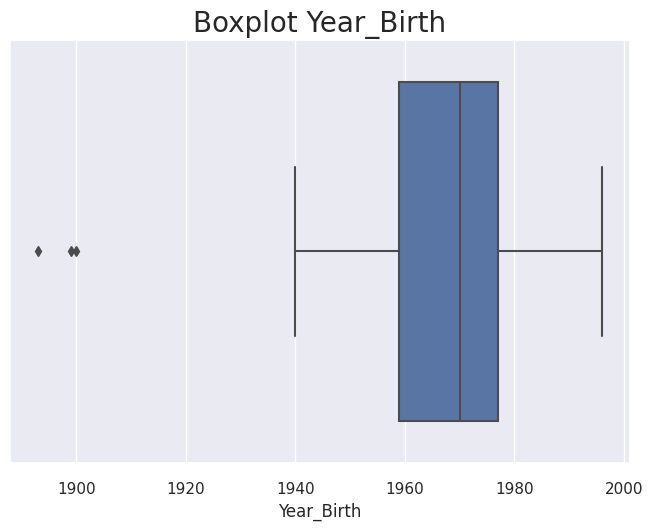

In [ ]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

In [ ]:
df[df['Year_Birth'] < 1920]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/2014,23,0,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,9/26/2013,36,144,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,6,7,4,25,1,2,1,2,5,0,1


In [ ]:
df = df[df['Year_Birth'] > 1920]

<Axes: title={'center': 'Boxplot Year_Birth'}, xlabel='Year_Birth'>

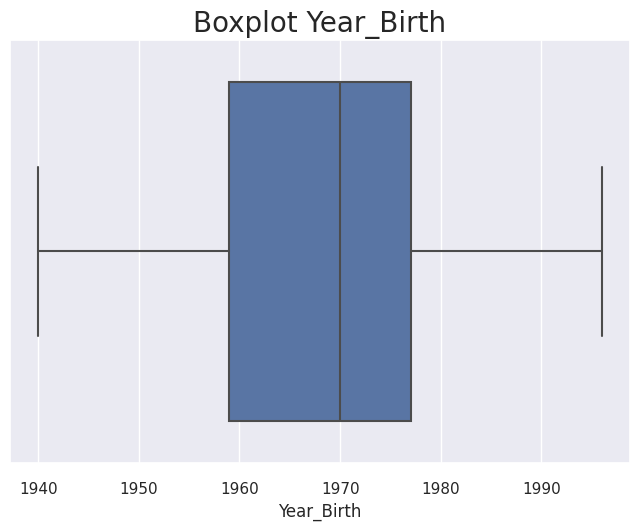

In [ ]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

<Axes: title={'center': 'Boxplot Income'}, xlabel='Income'>

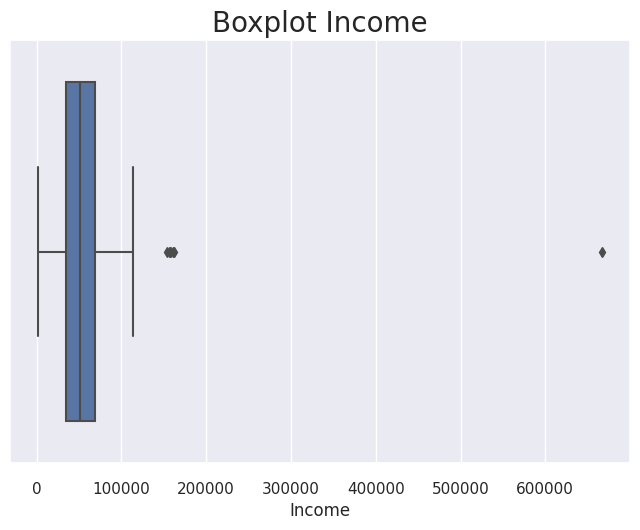

In [ ]:
plt.title("Boxplot Income", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Income"])

In [ ]:
df = df[df['Income'] < 400000]

<Axes: title={'center': 'Boxplot Income'}, xlabel='Income'>

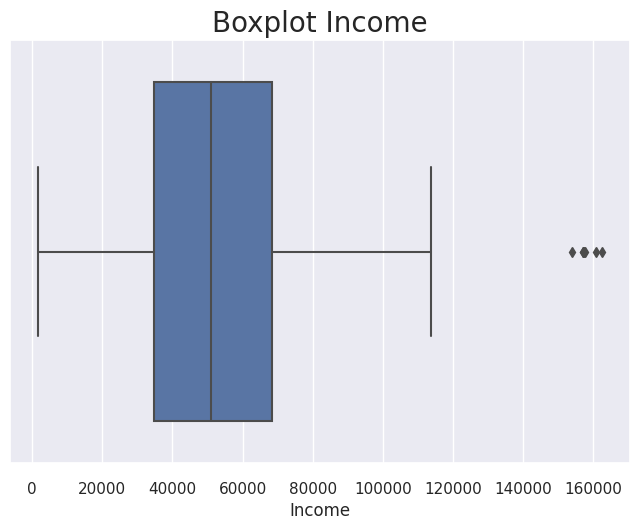

In [ ]:
plt.title("Boxplot Income", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Income"])

<Axes: title={'center': 'Boxplot Recency'}, xlabel='Recency'>

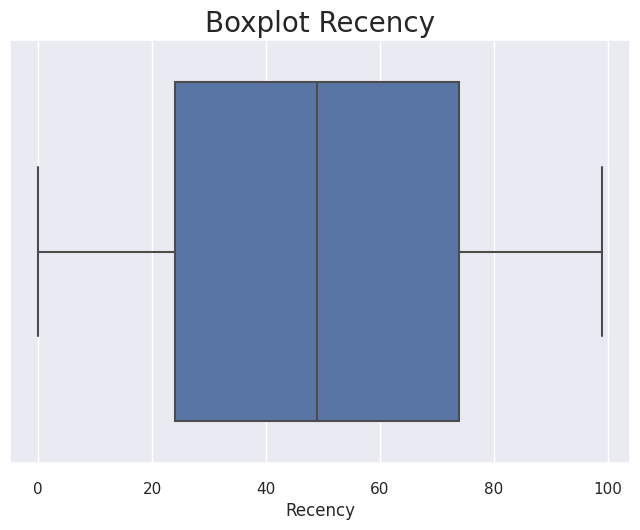

In [ ]:
plt.title("Boxplot Recency", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Recency"])

<Axes: title={'center': 'Boxplot MntFruits'}, xlabel='MntFruits'>

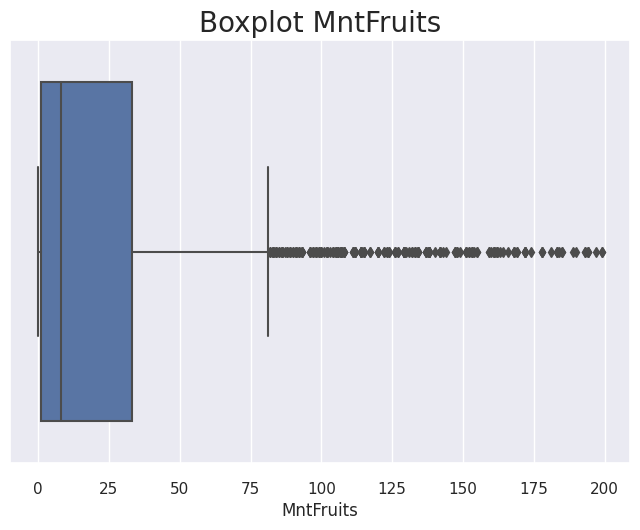

In [ ]:
plt.title("Boxplot MntFruits", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFruits"])

<Axes: title={'center': 'Boxplot MntFishProducts'}, xlabel='MntFishProducts'>

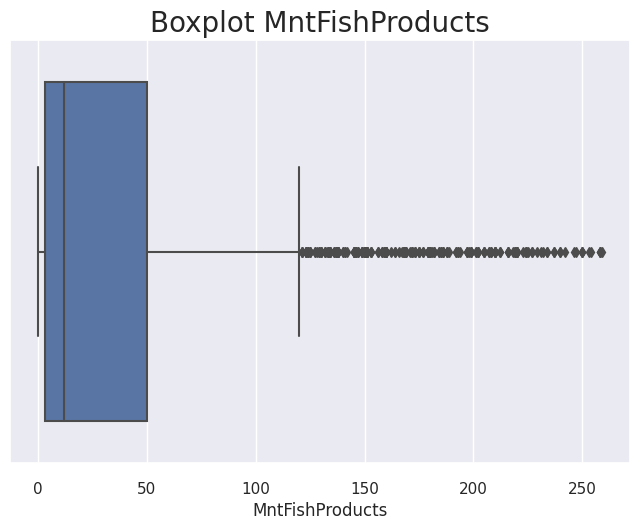

In [ ]:
plt.title("Boxplot MntFishProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFishProducts"])

<Axes: title={'center': 'Boxplot MntSweetProducts'}, xlabel='MntSweetProducts'>

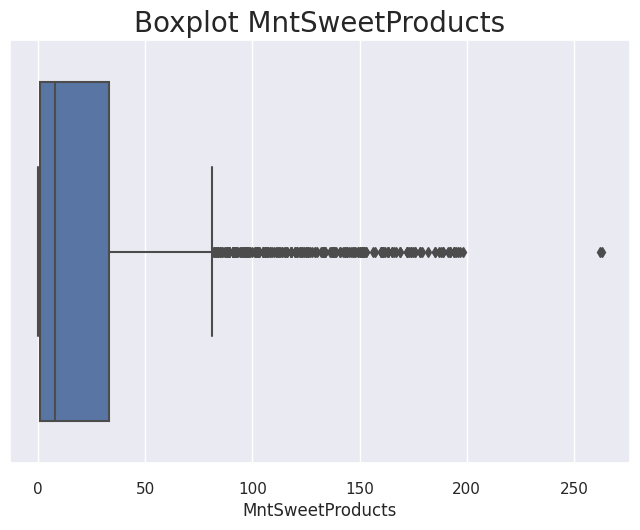

In [ ]:
plt.title("Boxplot MntSweetProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntSweetProducts"])

<Axes: title={'center': 'Boxplot MntGoldProds'}, xlabel='MntGoldProds'>

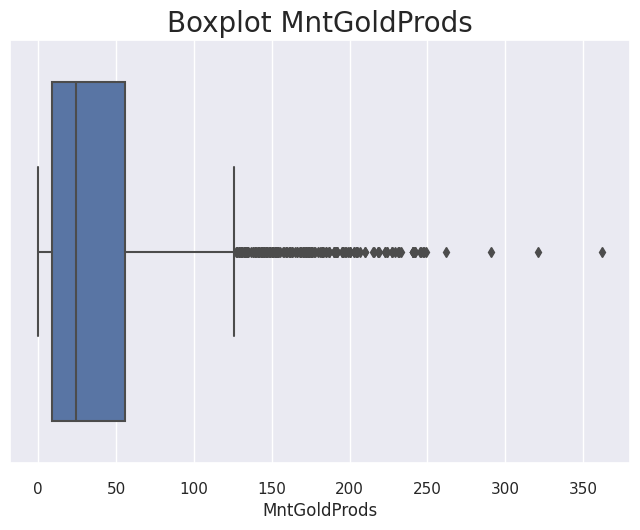

In [ ]:
plt.title("Boxplot MntGoldProds", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntGoldProds"])

<Axes: xlabel='Complain', ylabel='count'>

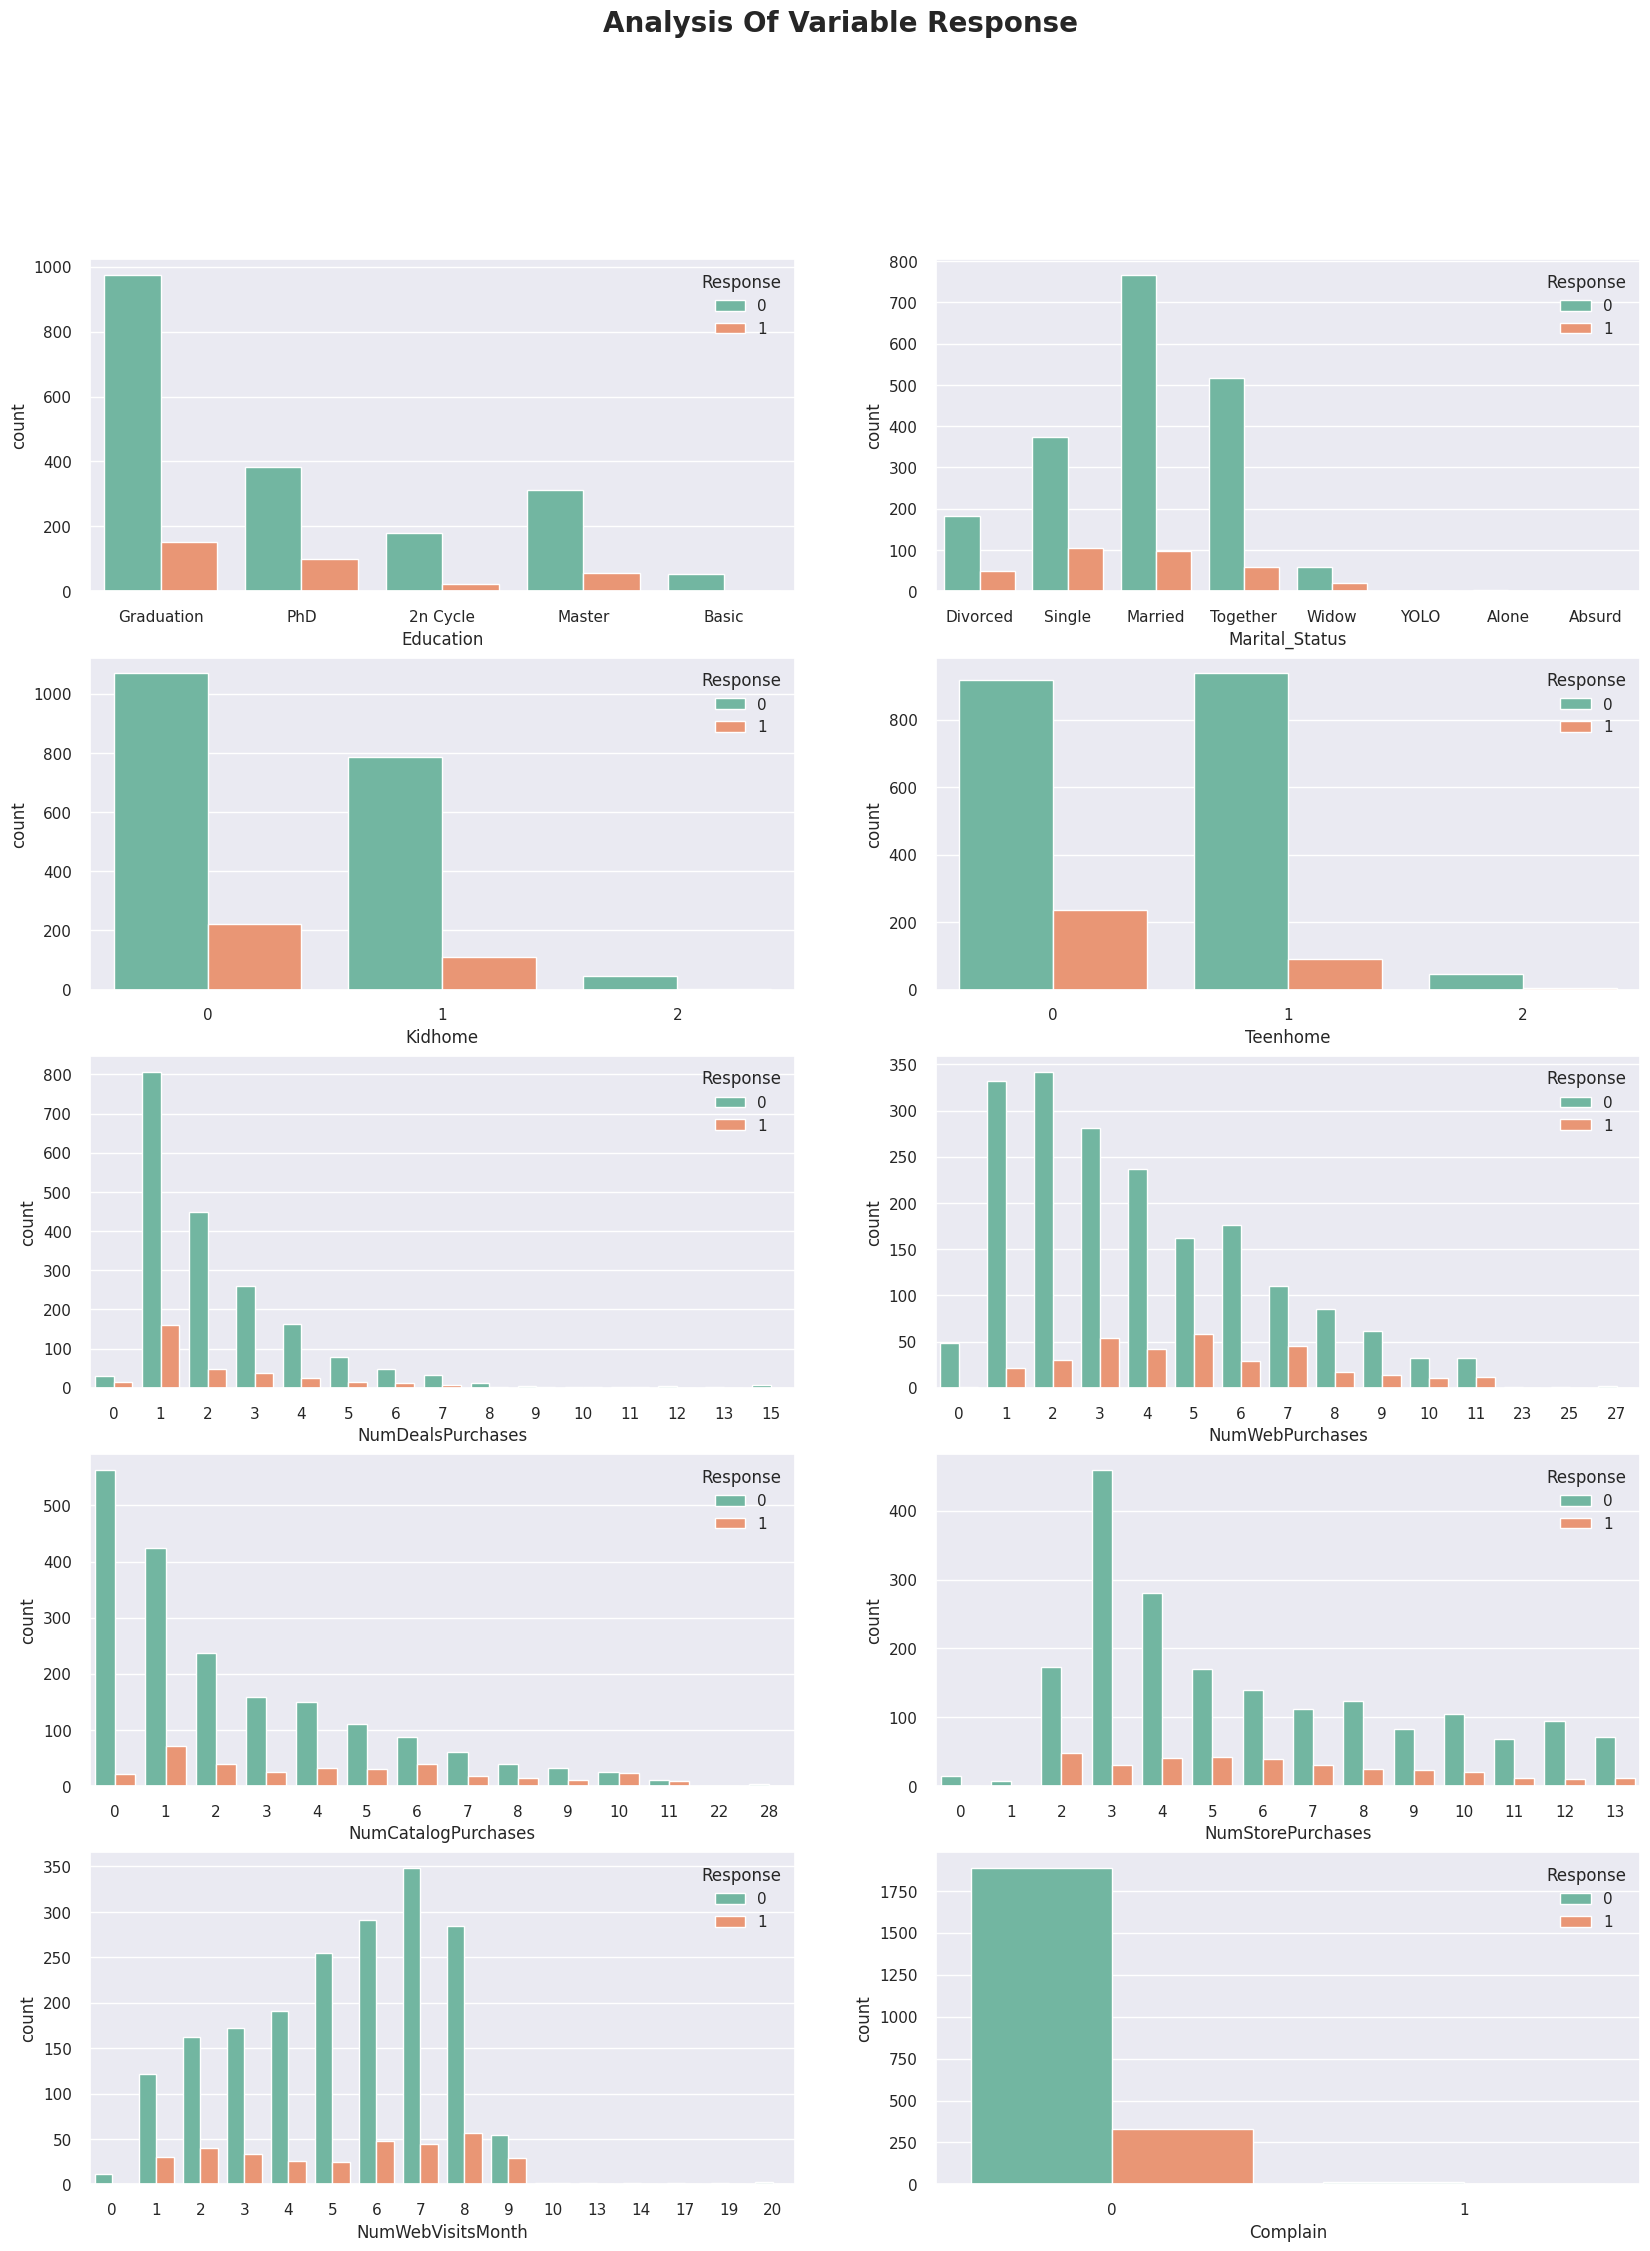

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Education', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Marital_Status', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Kidhome', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Teenhome', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'NumDealsPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'NumWebPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'NumCatalogPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'NumStorePurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,9)
sns.countplot(x = 'NumWebVisitsMonth', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,10)
sns.countplot(x = 'Complain', hue = 'Response', palette = 'Set2', data = df)

<Axes: xlabel='Response', ylabel='MntGoldProds'>

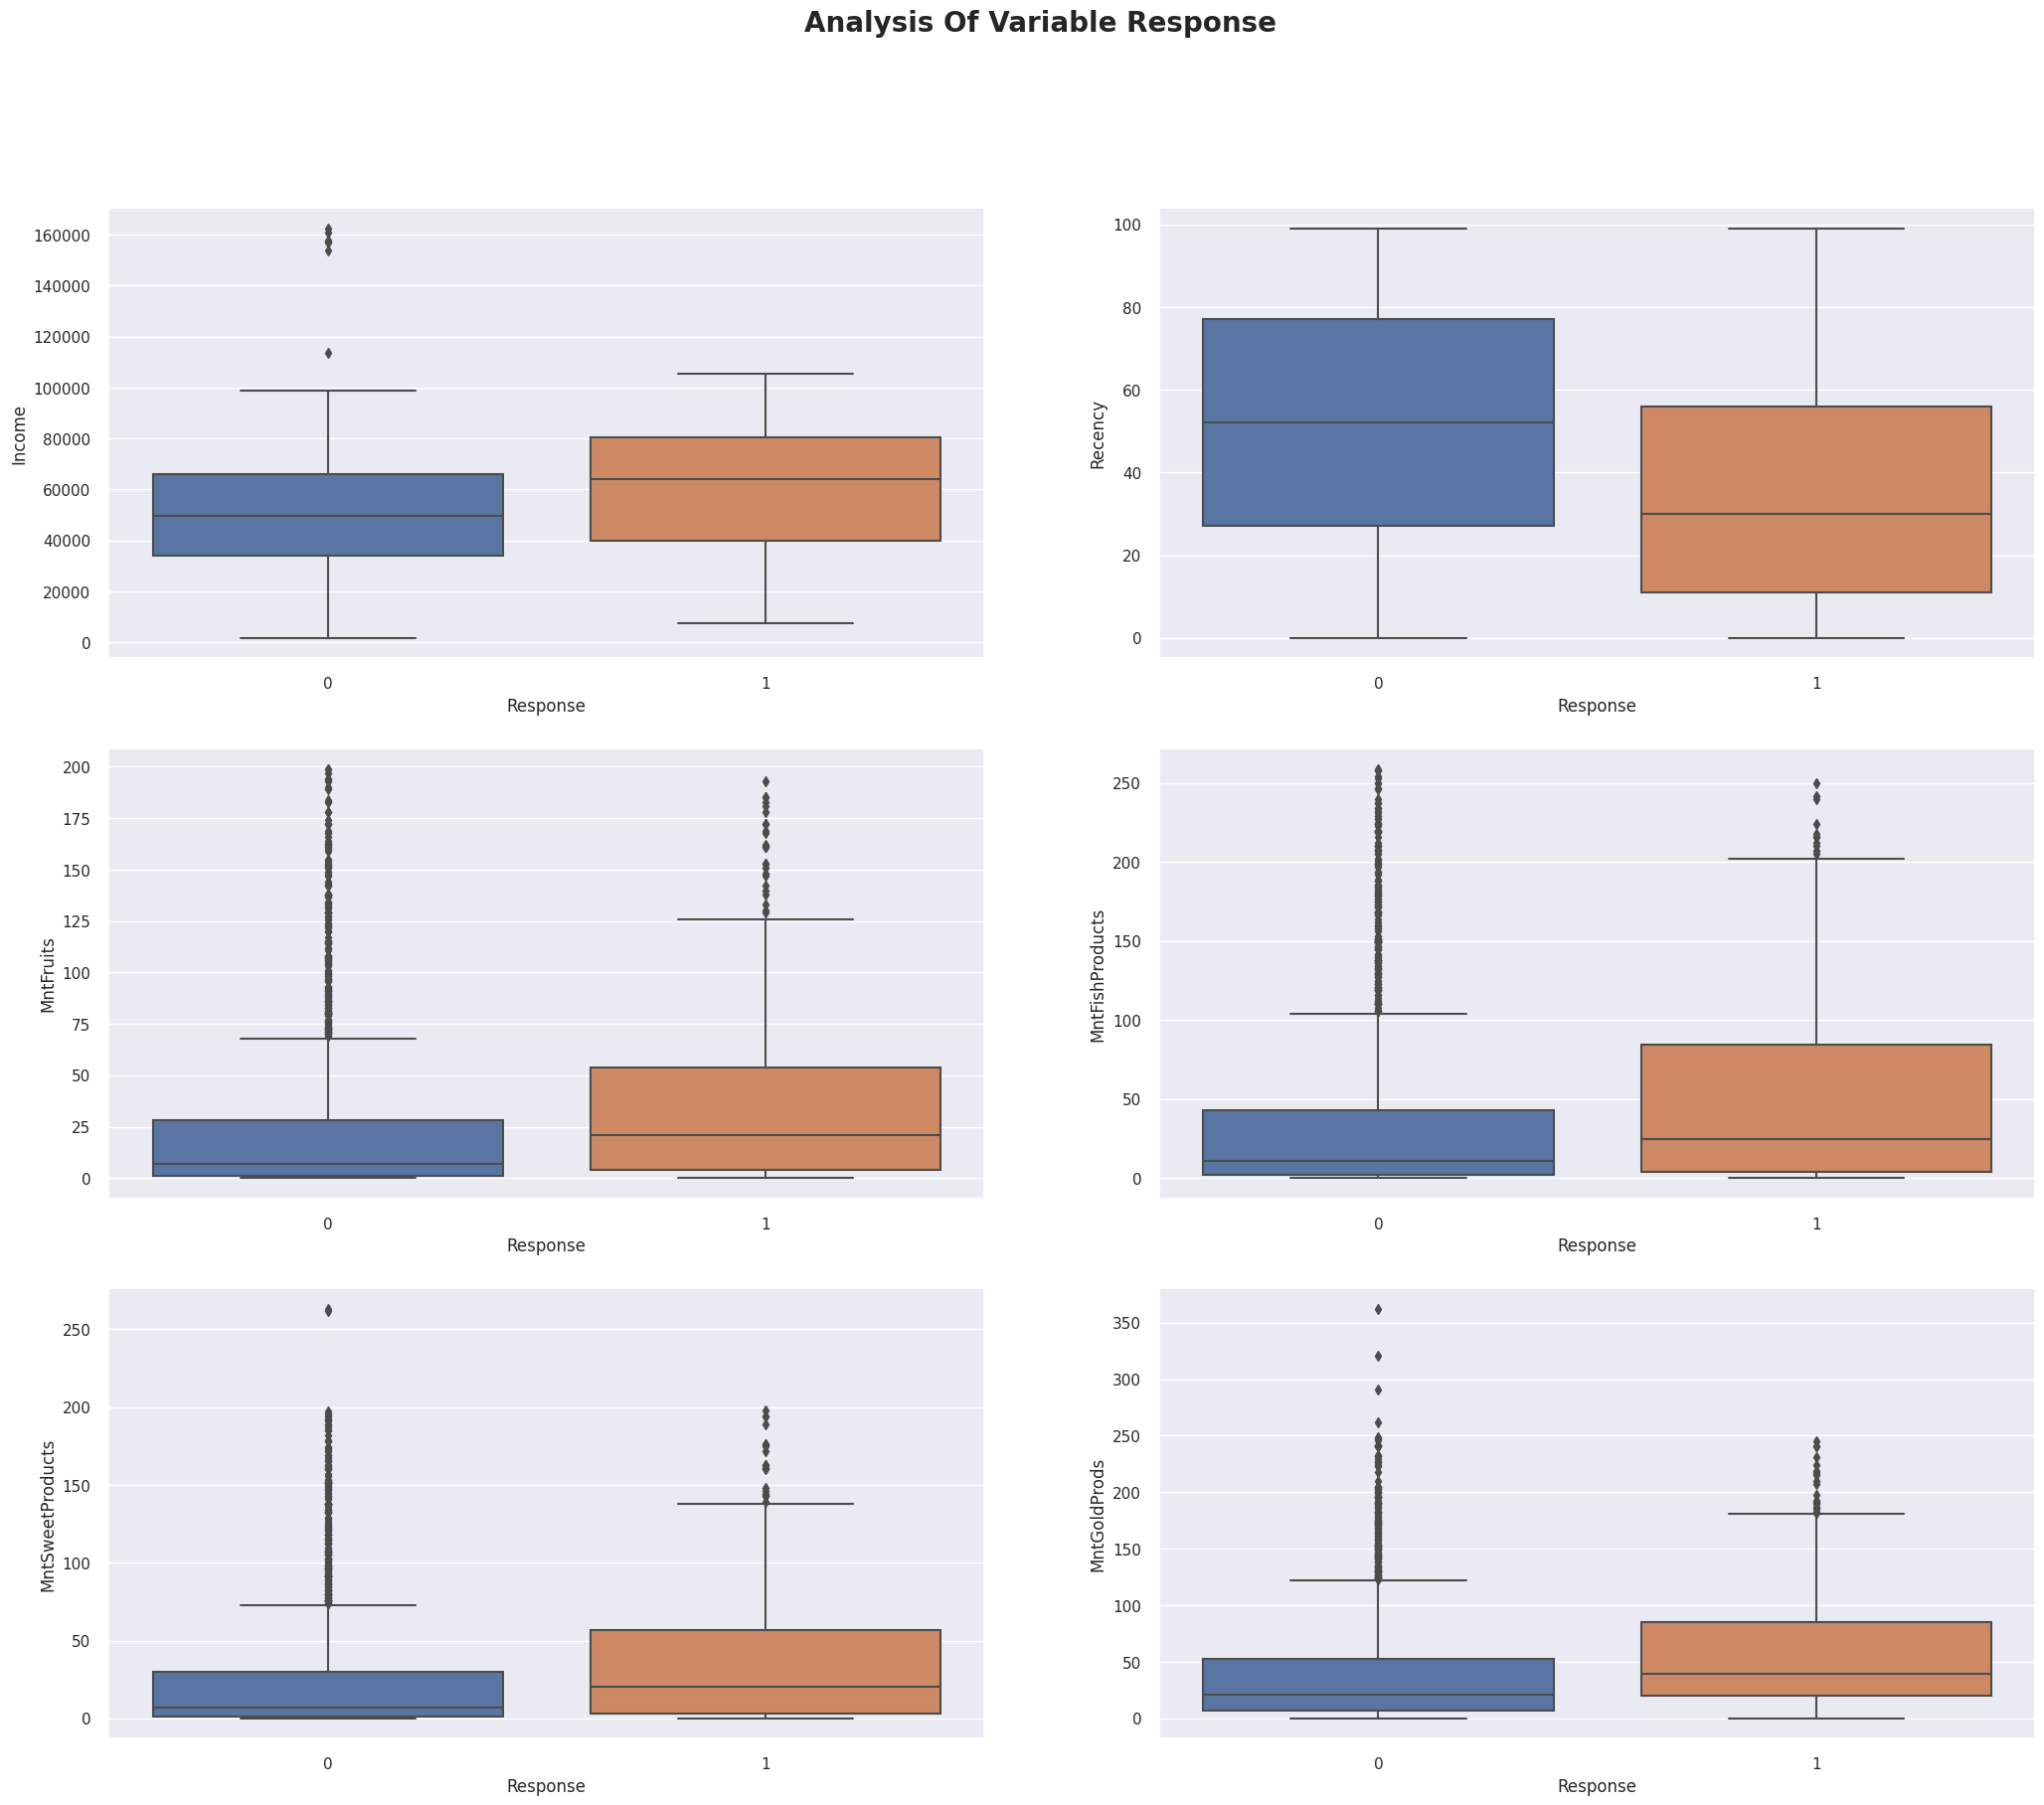

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Response", y="Income", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Response", y="Recency", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Response", y="MntFruits", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Response", y="MntFishProducts", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Response", y="MntSweetProducts", data=df)

plt.subplot(3,2,6)
sns.boxplot(x="Response", y="MntGoldProds", data=df)

#Pemodelan

Label Encoder
* Di sini kita akan menggunakan LabelEncoder untuk mengubah variabel kategorikal kita menjadi variabel numerik.
* Mari kita hapus dari basis data variabel ID dan variabel DT_Customer yang tidak masuk akal untuk tetap ada dalam model

In [ ]:
df = df.drop(['Id', 'Dt_Customer'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Education = LabelEncoder()
label_encoder_Marital_Status = LabelEncoder()

df['Education'] = label_encoder_Education.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder_Marital_Status.fit_transform(df['Marital_Status'])

In [ ]:
X = df.drop('Response', axis = 1)
X = X.values
y = df['Response']

Menyeimbangkan Kelas
* Karena kita memiliki banyak nilai dari satu kelas dan sedikit nilai dari
kelas lainnya, kita akan menyeimbangkan kelas-kelas tersebut menggunakan Oversampling untuk membuat kelas-kelas tersebut seimbang.

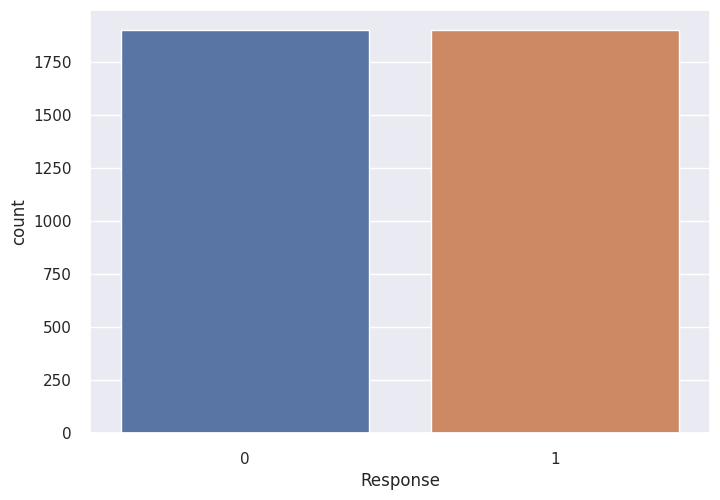

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [ ]:
X.shape, y.shape

((3804, 17), (3804,))

StandardScaler
*
Di sini, kita akan menggunakan StandardScaler untuk menempatkan data kita pada skala yang sama



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Mentransformasi Data menjadi Train dan Test, di sini kita akan menggunakan 30% dari data kita untuk menguji model machine learning.






In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

**NAIVE BAYES**


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, previsoes)
print("Akurasi Model Naive Bayes:", accuracy)

Akurasi Model Naive Bayes: 0.638353765323993


In [ ]:
score_naive_gaussian = 0.638353765323993

0.638353765323993

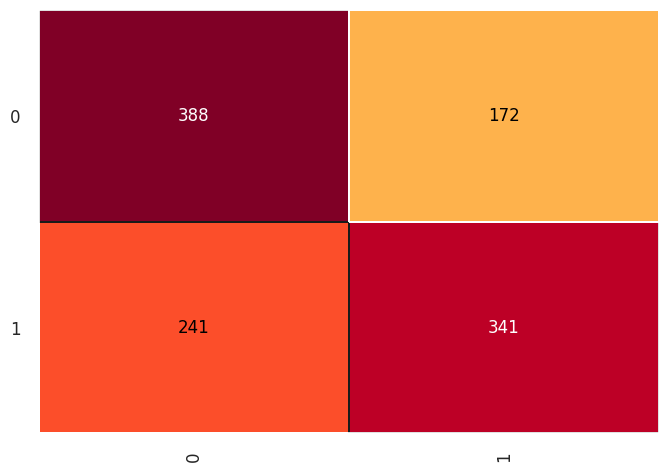

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       560
           1       0.66      0.59      0.62       582

    accuracy                           0.64      1142
   macro avg       0.64      0.64      0.64      1142
weighted avg       0.64      0.64      0.64      1142



**Decision Tree**

In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  4
Max Nvl:  11
Algorithm:  gini
Score:  0.8925609050769513


In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, previsoes)
print("Akurasi Model Decision Tree:", accuracy)

Akurasi Model Decision Tree: 0.8861646234676007


In [ ]:
score_tree = 0.8861646234676007

0.8861646234676007

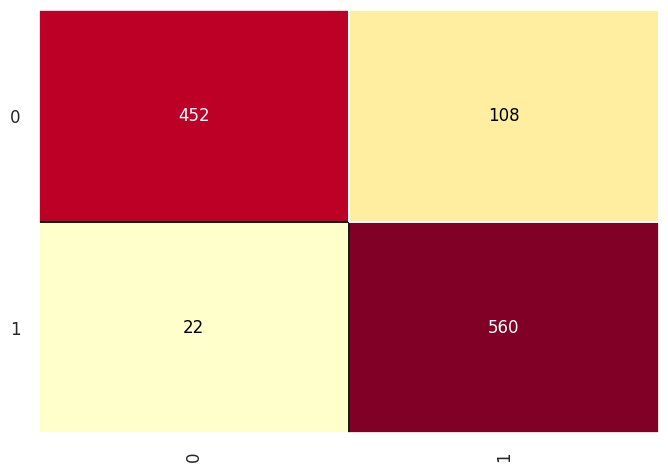

In [ ]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       560
           1       0.84      0.96      0.90       582

    accuracy                           0.89      1142
   macro avg       0.90      0.88      0.89      1142
weighted avg       0.89      0.89      0.89      1142



In [ ]:
columns = df.drop('Response', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

MntGoldProds           0.175222
Recency                0.169979
NumCatalogPurchases    0.089695
Income                 0.086386
NumWebVisitsMonth      0.084108
Year_Birth             0.059644
NumStorePurchases      0.054827
MntSweetProducts       0.051322
MntFruits              0.049341
MntFishProducts        0.047435
NumWebPurchases        0.033816
Teenhome               0.032185
Education              0.020935
Marital_Status         0.017604
Kidhome                0.016822
NumDealsPurchases      0.010679
Complain               0.000000
dtype: float64

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.9402657676085147
Mín Split:  2
Max Nvl:  11


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, previsoes)
print("Akurasi Model Random Forest:", accuracy)

Akurasi Model Random Forest: 0.9439579684763573


In [ ]:
score_random = 0.9439579684763573

0.9439579684763573

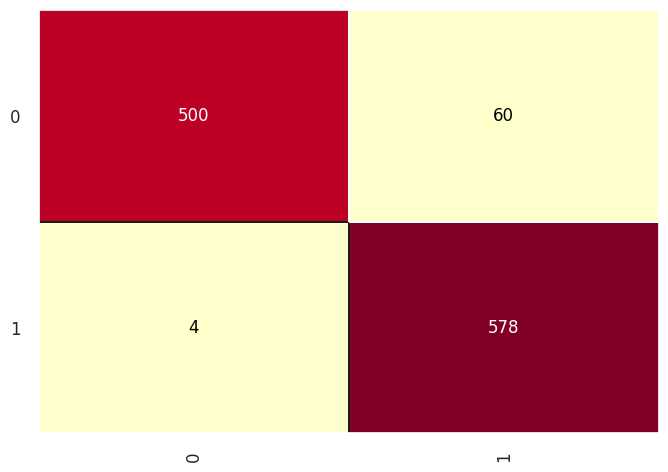

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)


In [ ]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       560
           1       0.91      0.99      0.95       582

    accuracy                           0.94      1142
   macro avg       0.95      0.94      0.94      1142
weighted avg       0.95      0.94      0.94      1142



In [ ]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Recency                0.144072
Income                 0.112787
MntGoldProds           0.104496
NumCatalogPurchases    0.089716
NumWebVisitsMonth      0.070517
MntSweetProducts       0.057800
MntFruits              0.056474
NumWebPurchases        0.055529
Year_Birth             0.053929
MntFishProducts        0.052546
NumStorePurchases      0.052066
NumDealsPurchases      0.038731
Teenhome               0.037627
Marital_Status         0.031067
Education              0.029654
Kidhome                0.012477
Complain               0.000510
dtype: float64

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, previsoes)
print("Akurasi Model Logistic Regression:", accuracy)

Akurasi Model Logistic Regression: 0.7381786339754816


In [ ]:
logistic_normal = 0.7381786339754816

0.7381786339754816

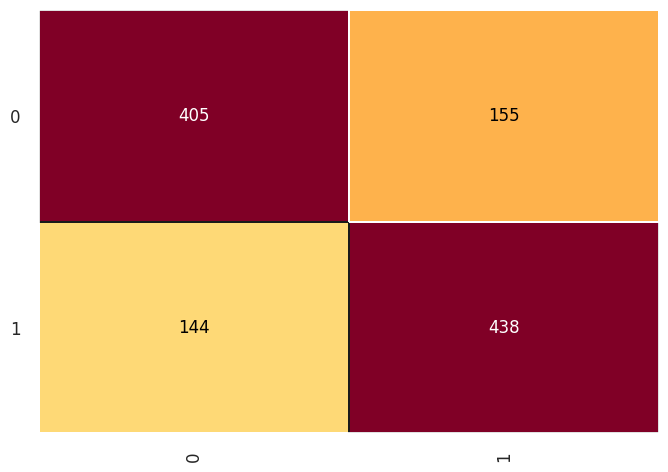

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       560
           1       0.74      0.75      0.75       582

    accuracy                           0.74      1142
   macro avg       0.74      0.74      0.74      1142
weighted avg       0.74      0.74      0.74      1142



**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
model = SVC()

kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = np.array([3, 4, 5])
polinomio = np.array([2, 3, 4, 5])
gamma = ['auto', 'scale']
values_grid = {'C': c, 'kernel': kernel, 'degree': polinomio, 'gamma': gamma}
gridSVM = GridSearchCV(estimator = model, param_grid = values_grid, cv = 2, n_jobs = -1)
gridSVM.fit(X_train, y_train)

print('Kernel: ', gridSVM.best_estimator_.kernel)
print('C: ', gridSVM.best_estimator_.C)
print('Polinomio', gridSVM.best_estimator_.degree)
print('Gamma', gridSVM.best_estimator_.gamma)
print('Score: ', gridSVM.best_score_)

Kernel:  poly
C:  5
Polinomio 5
Gamma auto
Score:  0.8512396694214877


In [ ]:
svm = SVC(kernel = 'poly',degree = 5, gamma = 'auto', random_state = 1, C = 5.0)
svm.fit(X_train, y_train)
previsoes = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, previsoes)
print("Akurasi Model SVM:", accuracy)

Akurasi Model SVM: 0.8712784588441331


In [ ]:
score_svm = 0.8712784588441331

0.8712784588441331

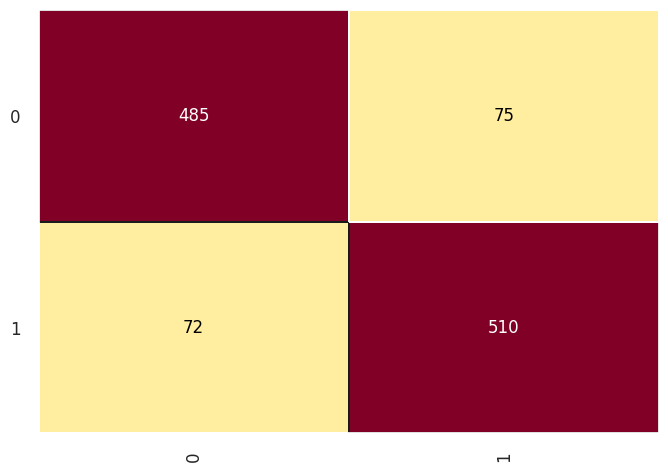

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
svm = classification_report(y_test, previsoes)
print(svm)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       560
           1       0.87      0.88      0.87       582

    accuracy                           0.87      1142
   macro avg       0.87      0.87      0.87      1142
weighted avg       0.87      0.87      0.87      1142



**Chi Square Score**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score'])

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
Income,1639748.50
MntFishProducts,7874.45
MntGoldProds,7533.87
MntSweetProducts,7020.55
MntFruits,6553.90
Recency,6000.05
NumCatalogPurchases,985.01
NumWebPurchases,269.35
Teenhome,134.73
Kidhome,34.30


Decision Tree

In [ ]:
feature_imp

MntGoldProds           0.175222
Recency                0.169979
NumCatalogPurchases    0.089695
Income                 0.086386
NumWebVisitsMonth      0.084108
Year_Birth             0.059644
NumStorePurchases      0.054827
MntSweetProducts       0.051322
MntFruits              0.049341
MntFishProducts        0.047435
NumWebPurchases        0.033816
Teenhome               0.032185
Education              0.020935
Marital_Status         0.017604
Kidhome                0.016822
NumDealsPurchases      0.010679
Complain               0.000000
dtype: float64

In [ ]:
feature_imp_random

Recency                0.144072
Income                 0.112787
MntGoldProds           0.104496
NumCatalogPurchases    0.089716
NumWebVisitsMonth      0.070517
MntSweetProducts       0.057800
MntFruits              0.056474
NumWebPurchases        0.055529
Year_Birth             0.053929
MntFishProducts        0.052546
NumStorePurchases      0.052066
NumDealsPurchases      0.038731
Teenhome               0.037627
Marital_Status         0.031067
Education              0.029654
Kidhome                0.012477
Complain               0.000510
dtype: float64

#Kesimpulan

In [ ]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Accuracy':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Accuracy':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Accuracy':score_random}


Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Accuracy':logistic_normal}

svm = {'Model':'SVM',
               'Scaling':'Standard Data',
               'Type':'Poly',
               'Accuracy':score_svm}



resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'SVM':pd.Series(svm)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Logistic Regression,SVM
Model,Naive Bayes,Decision Tree,Random Forest,Logistic Regression,SVM
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Standard Data
Type,Gaussian,Gini,Gini,-,Poly
Accuracy,0.638354,0.886165,0.943958,0.738179,0.871278
